In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13']
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\Wine\Wine_NE_20.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,14.23,1.71,2.43,15.6,127.0,2.80,NaN,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,NaN,2.14,NaN,100.0,NaN,2.76,0.26,NaN,NaN,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,NaN,NaN,3.49,0.24,2.18,7.80,0.86,NaN,1480.0
4,13.24,2.59,2.87,21.0,118.0,NaN,2.69,NaN,1.82,4.32,NaN,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,NaN,2.45,NaN,95.0,1.68,0.61,0.52,NaN,7.70,0.64,NaN,740.0
174,13.40,3.91,2.48,NaN,102.0,NaN,0.75,0.43,1.41,7.30,0.70,NaN,750.0
175,13.27,4.28,2.26,NaN,120.0,1.59,0.69,0.43,1.35,NaN,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,NaN,1.65,0.68,0.53,1.46,9.30,0.60,1.62,NaN


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	15
float64		column 2	31
float64		column 3	30
float64		column 4	46
float64		column 5	15
float64		column 6	61
float64		column 7	45
float64		column 8	30
float64		column 9	46
float64		column 10	31
float64		column 11	30
float64		column 12	31
float64		column 13	45


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
count,163.000000,147.000000,148.000000,132.000000,163.000000,117.000000,133.000000,148.000000,132.000000,147.000000,148.000000,147.000000,133.000000
mean,12.996994,2.298231,2.376554,19.681818,99.754601,2.258120,2.038271,0.354189,1.514697,5.183265,0.964162,2.632653,752.037594
std,0.802657,1.022880,0.262481,2.990821,13.793939,0.583722,0.971758,0.118975,0.487158,2.300863,0.224427,0.694048,300.083812
min,11.030000,0.740000,1.700000,10.600000,70.000000,0.980000,0.470000,0.130000,0.410000,1.280000,0.480000,1.290000,278.000000
25%,12.370000,1.610000,2.227500,18.000000,88.500000,1.790000,1.250000,0.267500,1.225000,3.390000,0.807500,2.035000,520.000000
50%,13.050000,1.880000,2.365000,19.500000,98.000000,2.200000,2.140000,0.320000,1.545000,4.920000,0.960000,2.780000,680.000000
75%,13.625000,3.010000,2.542500,21.500000,107.000000,2.700000,2.760000,0.430000,1.870000,6.340000,1.120000,3.160000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,2.810000,13.000000,1.710000,4.000000,1547.000000


<AxesSubplot:>

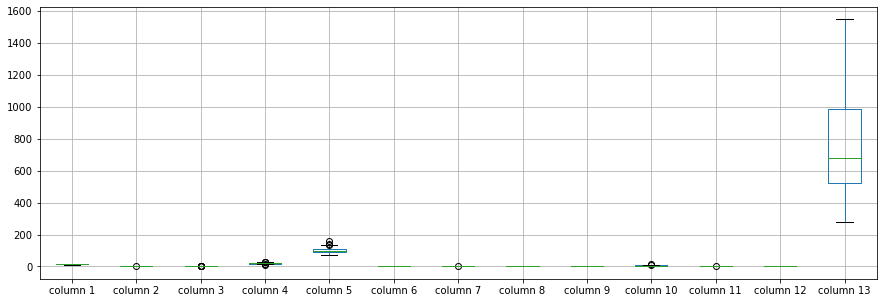

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1      12.996994
column 2       2.298231
column 3       2.376554
column 4      19.681818
column 5      99.754601
column 6       2.258120
column 7       2.038271
column 8       0.354189
column 9       1.514697
column 10      5.183265
column 11      0.964162
column 12      2.632653
column 13    752.037594
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
column 1,1.000000,0.091854,0.129269,-0.220420,0.297750,0.237460,0.204960,-0.143628,0.230395,0.521853,-0.075893,0.036663,0.626900
column 2,0.091854,1.000000,0.071296,0.292973,-0.053229,-0.306001,-0.425460,0.221844,-0.241450,0.156973,-0.486403,-0.241933,-0.190738
column 3,0.129269,0.071296,1.000000,0.412743,0.339851,0.033979,0.084931,0.121210,-0.001160,0.186103,-0.131447,-0.033032,0.191070
column 4,-0.220420,0.292973,0.412743,1.000000,-0.048773,-0.196364,-0.349476,0.332924,-0.074330,-0.088429,-0.193734,-0.160907,-0.419185
column 5,0.297750,-0.053229,0.339851,-0.048773,1.000000,0.245046,0.215132,-0.233394,0.185300,0.234450,0.072756,0.056881,0.389655
column 6,0.237460,-0.306001,0.033979,-0.196364,0.245046,1.000000,0.832599,-0.441975,0.579285,-0.089938,0.410986,0.719675,0.527201
column 7,0.204960,-0.425460,0.084931,-0.349476,0.215132,0.832599,1.000000,-0.474008,0.616916,-0.125845,0.530453,0.729875,0.554539
column 8,-0.143628,0.221844,0.121210,0.332924,-0.233394,-0.441975,-0.474008,1.000000,-0.340216,0.139621,-0.196903,-0.476519,-0.268491
column 9,0.230395,-0.241450,-0.001160,-0.074330,0.185300,0.579285,0.616916,-0.340216,1.000000,0.015348,0.270824,0.494827,0.321552
column 10,0.521853,0.156973,0.186103,-0.088429,0.234450,-0.089938,-0.125845,0.139621,0.015348,1.000000,-0.531718,-0.486390,0.285664


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [13,13+99,13+99+99,13+99+99,13+99+99+99+99,13+99+99+99+99+99,13+99+99+99+99+99+99,13+99+99+99+99+99,13+99+99+99+99,13+99+99+99,13+99+99,13+99,13], vae_layer = False, seed = 990)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [13]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 735.4935274991122
Epoch: 1 , loss: 731.4588955965909
Epoch: 2 , loss: 733.3339760520241
Epoch: 3 , loss: 735.4703868519176
Epoch: 4 , loss: 742.5186490145596
Epoch: 5 , loss: 738.8694291548295
Epoch: 6 , loss: 733.8419688831676
Epoch: 7 , loss: 729.2449229847301
Epoch: 8 , loss: 732.2765391956676
Epoch: 9 , loss: 733.8661277077415
Epoch: 10 , loss: 737.9274402965199
Epoch: 11 , loss: 733.1205444335938
Epoch: 12 , loss: 725.919355912642
Epoch: 13 , loss: 730.6608553799716
Epoch: 14 , loss: 724.28662109375
Epoch: 15 , loss: 730.6103737571023
Epoch: 16 , loss: 723.9155606356534
Epoch: 17 , loss: 729.6126764470881
Epoch: 18 , loss: 716.1974764737216
Epoch: 19 , loss: 720.3705610795455
Epoch: 20 , loss: 716.197323885831
Epoch: 21 , loss: 716.3793418190696
Epoch: 22 , loss: 709.7073364257812
Epoch: 23 , loss: 722.8073175603694
Epoch: 24 , loss: 715.5496326793324
Epoch: 25 , loss: 706.8165810324929
Epoch: 26 

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(178, 13)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1      12.930000
column 2       3.800000
column 3       2.650000
column 4       1.022942
column 5     102.000000
column 6      -0.214913
column 7       2.410000
column 8       0.250000
column 9       1.980000
column 10      4.500000
column 11      1.030000
column 12      3.520000
column 13     38.016808
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\Wine.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,-2.835578,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.0,-1.507034,0.000000,-1.301832,0.000000,-4.669808,0.000000,0.000000,-1.966330,-2.698758,0.000000,0.000000,0.000000
2,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.0,0.000000,0.000000,0.000000,-101.188665,-3.563021,0.000000,0.000000,0.000000,0.000000,0.000000,-3.086192,0.000000
4,0.0,0.000000,0.000000,0.000000,0.000000,-3.568056,0.000000,-1.094304,0.000000,0.000000,-3.279617,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.0,-4.290506,0.000000,-7.748927,0.000000,0.000000,0.000000,0.000000,-0.214399,0.000000,0.000000,-0.927068,0.000000
174,0.0,0.000000,0.000000,-6.466568,0.000000,-1.478055,0.000000,0.000000,0.000000,0.000000,0.000000,-1.137372,0.000000
175,0.0,0.000000,0.000000,-15.884700,0.000000,0.000000,0.000000,0.000000,0.000000,-8.936607,0.000000,0.000000,0.000000
176,0.0,0.000000,0.000000,0.000000,-78.840710,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-653.001343


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(4826.754598376106, 10898.078031484092)

In [17]:
NRMS=numerator/denominator
NRMS


0.4428996181190677

In [18]:
new_df.iloc[66,:]

column 1      13.110000
column 2       1.628394
column 3       1.700000
column 4      15.000000
column 5      78.000000
column 6       2.980000
column 7       3.180000
column 8       0.260000
column 9       2.280000
column 10      5.300000
column 11      1.120000
column 12      2.627763
column 13    502.000000
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,14.23,1.710000,2.430000,15.600000,127.000000,2.800000,0.224422,0.280000,2.290000,5.640000,1.040000,3.920000,1065.000000
1,13.20,0.272966,2.140000,9.898168,100.000000,-2.019808,2.760000,0.260000,-0.686330,1.681242,1.050000,3.400000,1050.000000
2,13.16,2.360000,2.670000,18.600000,101.000000,2.800000,3.240000,0.300000,2.810000,5.680000,1.030000,3.170000,1185.000000
3,14.37,1.950000,2.500000,16.800000,11.811335,0.286979,3.490000,0.240000,2.180000,7.800000,0.860000,0.363808,1480.000000
4,13.24,2.590000,2.870000,21.000000,118.000000,-0.768056,2.690000,-0.704304,1.820000,4.320000,-2.239617,2.930000,735.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,1.359494,2.450000,12.751073,95.000000,1.680000,0.610000,0.520000,0.845601,7.700000,0.640000,0.812932,740.000000
174,13.40,3.910000,2.480000,16.533432,102.000000,0.321945,0.750000,0.430000,1.410000,7.300000,0.700000,0.422628,750.000000
175,13.27,4.280000,2.260000,4.115300,120.000000,1.590000,0.690000,0.430000,1.350000,1.263393,0.590000,1.560000,835.000000
176,13.17,2.590000,2.370000,20.000000,41.159290,1.650000,0.680000,0.530000,1.460000,9.300000,0.600000,1.620000,186.998657


In [20]:
imputations[-1].to_excel("Wine_NE_20(imp).xlsx", index=False, header=False)